In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

import pickle

In [2]:
df = pd.read_csv('classic_adult_preproc.csv')
df

,Federal-gov,Local-gov,NA wc,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,...,Vietnam,Yugoslavia,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,0,0,0,0,0,0,0,1,0,0,...,0,0,39,77516,13,1,2174,0,40,<=50K
1,0,0,0,0,0,0,1,0,0,0,...,0,0,50,83311,13,1,0,0,13,<=50K
2,0,0,0,0,1,0,0,0,0,1,...,0,0,38,215646,9,1,0,0,40,<=50K
3,0,0,0,0,1,0,0,0,0,0,...,0,0,53,234721,7,1,0,0,40,<=50K
4,0,0,0,0,1,0,0,0,0,0,...,0,0,28,338409,13,0,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,27,257302,12,0,0,0,38,<=50K
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,40,154374,9,1,0,0,40,>50K
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,58,151910,9,0,0,0,40,<=50K
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,22,201490,9,1,0,0,20,<=50K


In [3]:
le = LabelEncoder()
df['wage_class'] = le.fit_transform(df['wage_class'])
df.head()

,Federal-gov,Local-gov,NA wc,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,...,Vietnam,Yugoslavia,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,0,0,0,0,0,0,0,1,0,0,...,0,0,39,77516,13,1,2174,0,40,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,50,83311,13,1,0,0,13,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,38,215646,9,1,0,0,40,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,53,234721,7,1,0,0,40,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,28,338409,13,0,0,0,40,0


In [4]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [7]:
X = df.iloc[:, :-1]
Y = df['wage_class']

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y)
Xtrain.shape, Xtest.shape

((24420, 91), (8141, 91))

In [10]:
xgbc = XGBClassifier()
xgbc.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [11]:
Ypred = xgbc.predict(Xtest)

In [13]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6181
           1       0.78      0.66      0.71      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141



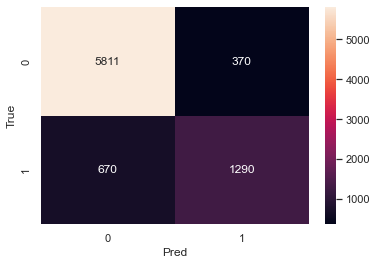

In [18]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm , annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [20]:
with open('clad_xgbc.pkl', 'wb') as f:
    pickle.dump(xgbc, f)